## Day 31 Lecture 1 Assignment

In this assignment, we will learn about the K nearest neighbor algorithm. We will use the titanic dataset and create a model that can predict if a passenger will survive the Titanic Shipwreck or not {0, 1}.

In [132]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Columns:
- 'PassengerId': id of the passenger
- 'Survived': 
- 'Pclass': Ticket class
- 'Name': Name
- 'Sex': sex
- 'Age': Age in years
- 'SibSp': # of siblings / spouses aboard the Titanic
- 'Parch': # of parents / children aboard the Titanic
- 'Ticket': 
- 'Fare': Passenger fare
- 'Cabin': Cabin number
- 'Embarked': Port of Embarkation

In [133]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We check the distribution of variables for the column we want to predict.

In [134]:
# Calculate value counts for the Survived column
data['Survived'].value_counts()



0    549
1    342
Name: Survived, dtype: int64

First, check for missing data and remove all columns containing missing data

In [135]:
# Calculate NA values per column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [136]:
data = data.drop(['Age','Cabin','Embarked'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
dtypes: float64(1), int64(5), object(3)
memory usage: 62.8+ KB


We also drop columns that are not informative and contain too many unique values(e.g. name)

In [137]:
# Calculate unique values for each column
print('\n'.join([f"Column with name '{c}' has {data[c].nunique()} unique values" for c in data.columns]))    

Column with name 'PassengerId' has 891 unique values
Column with name 'Survived' has 2 unique values
Column with name 'Pclass' has 3 unique values
Column with name 'Name' has 891 unique values
Column with name 'Sex' has 2 unique values
Column with name 'SibSp' has 7 unique values
Column with name 'Parch' has 7 unique values
Column with name 'Ticket' has 681 unique values
Column with name 'Fare' has 248 unique values


In [138]:
# Drop columns 'PassengerId', 'Name' and 'Ticket'.
data = data.drop(['PassengerId','Name','Ticket'],axis=1)
data.head()



,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500


To use the data, we must convert all columns to numeric. Do this by replacing yes and no with 1 and 0.

In [139]:
# Use get_dummies to get a dataset with one hot encoded columns for categorical variables
# Survived should be excluded.
data['Male'] = pd.get_dummies(data['Sex'],drop_first=True)
data = data.drop('Sex',axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Male      891 non-null    uint8  
dtypes: float64(1), int64(4), uint8(1)
memory usage: 35.8 KB


In [140]:
# Let's check the new columns
data.head()



,Survived,Pclass,SibSp,Parch,Fare,Male
0,0,3,1,0,7.2500,1
1,1,1,1,0,71.2833,0
2,1,3,0,0,7.9250,0
3,1,1,1,0,53.1000,0
4,0,3,0,0,8.0500,1


Split the data into train and test. Use 20% of the data for our test subset. We will use the train_test_split function from scikit-learn for this.

In [141]:
# Split the dataset. Remember that the y arrays should include only the 'Survived' column which should be excluded from
# the X arrays
from sklearn.model_selection import train_test_split
y = data['Survived']
X = data.drop('Survived',axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

Generate a KNN model with k=1 for the dataset. What is the accuracy score for the train and test subsamples?

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# answer below:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train,y_train)
train_acc = accuracy_score(y_train, knn1.predict(X_train))
test_acc = accuracy_score(y_test, knn1.predict(X_test))
print('train accuracy score: ', train_acc)
print('test accuracy score: ', test_acc)

train accuracy score:  0.9030898876404494
test accuracy score:  0.7541899441340782


Would you say the model overfits? Why or why not? Put your answer in the comment below.

In [143]:
# answer below:
#The model is leaning towards over fit since the train accuracy is almost 1.

Let's optimize k. A good idea is to create plots that depict train and test accuracy for each candidate k. Since we have 2 classes, we will be selecting odd numbers in order to deal with possible ties. By selecting a really small k, e.g. k=1, we increase variance and the model is prone to overfitting since it will only take into account the nearest neighbor where there could be a lot of other close samples belonging to another class. By doing the opposite, selecting a big k we are prone to underfitting, as we increase bias as there is a higher probability to select the majority class.


In [144]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
k_list = range(1, 15, 2)

For each k value in the list created above we want to create and fit a knn instance on X_train, y_train and then make predictions both on the training set (X_train) as well as on the test set(X_test) and calculate accuracy and f1 score and append it to the corrensponding list.

In [145]:
# answer below:
for x in k_list:
  knn1 = KNeighborsClassifier(n_neighbors=x)
  knn1.fit(X_train,y_train)
  train_acc = accuracy_score(y_train, knn1.predict(X_train))
  test_acc = accuracy_score(y_test, knn1.predict(X_test))
  train_f1 = f1_score(y_train, knn1.predict(X_train))
  test_f1 = f1_score(y_test, knn1.predict(X_test))
  accuracy_train.append(train_acc)
  accuracy_test.append(test_acc)
  f1_train.append(train_f1)
  f1_test.append(test_f1)
print(accuracy_train)
print(accuracy_test)
print(f1_train)
print(f1_test)

[0.9030898876404494, 0.8595505617977528, 0.8398876404494382, 0.8117977528089888, 0.800561797752809, 0.7837078651685393, 0.7808988764044944]
[0.7541899441340782, 0.7988826815642458, 0.7877094972067039, 0.7821229050279329, 0.776536312849162, 0.7597765363128491, 0.7653631284916201]
[0.8690702087286528, 0.8106060606060606, 0.7865168539325844, 0.7462121212121212, 0.7350746268656717, 0.7137546468401487, 0.7045454545454545]
[0.6857142857142857, 0.75, 0.736111111111111, 0.7272727272727272, 0.7260273972602739, 0.6906474820143885, 0.7]


In the following plot we want to select the k that achieves the highest test score. 

Create a two plots with each of them depicting the following information:
1. Two lines, one for training accuracy and one for test accuracy for each k value.
2. Two lines, one for training F1score and one for test F1 score for each k value.

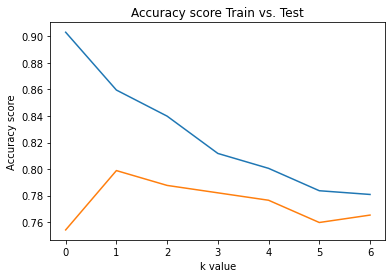

In [146]:
# answer below:
plt.plot(accuracy_train,label='train')
plt.plot(accuracy_test,label='test')
plt.title('Accuracy score Train vs. Test')
plt.xlabel('k value')
plt.ylabel('Accuracy score')
plt.show()


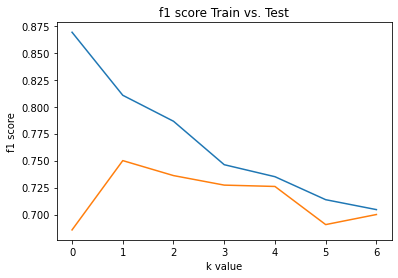

In [147]:
plt.plot(f1_train,label='train')
plt.plot(f1_test,label='test')
plt.title('f1 score Train vs. Test')
plt.xlabel('k value')
plt.ylabel('f1 score')
plt.show()

Please comment the results of the plots above

In [148]:
# Add your observations in comments below.
# Over all looks like a good fit. The k values are too small so the 2 lines are not overlapping each other. 
